<a href="https://colab.research.google.com/github/sudarshank1999/MLminiproj/blob/master/Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!ls

 Classroom			'queuelist (1).gdoc'
 dash.gdoc			 queuelist.gdoc
 dashu1.docx			 Screenshot_20200709-004447.png
'DBMS MANUAL-2018(Edited).doc'	 SmartKnower
 freshrs			 stacklist1-1.gdoc
'FRONT PAGE.gdoc'		'VID-20200721-WA0016 (1).mp4'
'House warming '		'VID-20200721-WA0016 (2).mp4'
 IMG-20180219-WA0000.jpg	'VID-20200721-WA0016 (3).mp4'
 Ml.ipynb			 VID-20200721-WA0016.mp4
'Pet resume.gdoc'		'VTU Result.pdf'


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!mkdir images

In [ ]:
cd images

/content/drive/My Drive/images


In [ ]:
from bing_image_downloader import downloader
downloader.download("goat animal",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Hausziege_04.jpg/1200px-Hausziege_04.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://animalcorner.co.uk/wp-content/uploads/2015/02/goat9-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-CqlAg4HDi_U/Ueli0KF3OcI/AAAAAAAADuo/jS9mD1-OT5I/s1600/Mountain_Goat_Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/-kSw8WgBV8Ao/Ueli0QoiQJI/AAAAAAAADus/-fF0fWsMUhU/s1600/Mountain_Goat_Wild_Animal.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/-3y9SL7PvwV0/TWY08s-mS0I/AAAAAAAABH8/zT4Ye2boCm0/s1600/goat_1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/-0lgVjUv3X_o/TtAM9ex2ixI/AAAAAAAADgc/ljTQ_SLYB6Y/s1600/goats.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://2.bp.blogspot.com/-nO4

In [ ]:
from bing_image_downloader import downloader
downloader.download("sheep animal",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-xM7EFJmmB10/UDXNMyxutsI/AAAAAAAAOzE/4a-2boG0Cek/s1600/Sheep6.JPG
[%] File Downloaded !

[%] Downloading Image #2 from https://vignette.wikia.nocookie.net/animals/images/b/ba/Sheep.jpg/revision/latest?cb=20190209033122
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-cO_dY4_B1OY/UDXM8YY1V8I/AAAAAAAAOyk/p_yWLUD93BM/s1600/Sheep2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/2/2c/Flock_of_sheep.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-OcOyqD_vmOw/T3AcE5mw8aI/AAAAAAAABnc/_EPNikT9kCs/s1600/Sheep.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://static.pexels.com/photos/20994/pexels-photo.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://lhfkidsblog.files.wordpress.com/2014/01/img_6364.jpg
[%] File Downloaded !

[%] Downlo

In [ ]:
downloader.download?

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target = []   
flat_data = []   
images= []

path = '/content/drive/My Drive/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(40, 7500)
(40,)
(40, 50, 50, 3)


In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.035294,0.109804,0.125490,0.047059,0.121569,0.137255,0.078431,0.150980,0.156863,0.109804,0.180392,0.178431,0.131373,0.203922,0.196078,0.112745,0.192157,0.180392,0.086275,0.176471,0.160784,0.086275,0.183333,0.164706,0.101961,0.188235,0.172549,0.105882,0.180392,0.175490,0.098039,0.172549,0.168627,0.101961,0.172549,0.172549,0.098039,0.168627,0.168627,0.094118,...,0.759804,0.800000,0.329412,0.775490,0.827451,0.234314,0.760784,0.813725,0.269608,0.613725,0.671569,0.252941,0.333333,0.381373,0.204902,0.209804,0.230392,0.192157,0.142157,0.147059,0.152941,0.104902,0.108824,0.122549,0.162745,0.170588,0.190196,0.215686,0.224510,0.247059,0.164706,0.176471,0.154902,0.284314,0.307843,0.143137,0.358824,0.389216,0.174510,goat animal
1,0.196078,0.305882,0.047059,0.208706,0.301961,0.066667,0.246471,0.317647,0.090196,0.270588,0.335647,0.094118,0.278431,0.337255,0.103255,0.278431,0.341176,0.090196,0.274510,0.333333,0.051725,0.301961,0.329412,0.078824,0.325490,0.334471,0.112078,0.321569,0.321569,0.141176,0.313725,0.300902,0.149020,0.278353,0.280392,0.121490,0.250980,0.277451,0.098039,0.299961,...,0.511765,0.430392,0.333333,0.568549,0.492118,0.396000,0.580392,0.510706,0.417490,0.560784,0.543255,0.501725,0.538078,0.466980,0.380706,0.574510,0.476275,0.370196,0.619608,0.529412,0.435294,0.615686,0.529412,0.427451,0.648392,0.569961,0.468000,0.701961,0.635294,0.544392,0.717647,0.647059,0.556275,0.721569,0.647059,0.549020,0.717647,0.643137,0.552941,goat animal
2,0.078431,0.196078,0.243137,0.070588,0.196078,0.254902,0.054902,0.192157,0.262745,0.043137,0.184314,0.266667,0.039216,0.184314,0.273529,0.035294,0.188235,0.286275,0.031373,0.188235,0.290196,0.027451,0.184314,0.286275,0.023529,0.180392,0.282353,0.019608,0.176471,0.278431,0.015686,0.172549,0.274510,0.015686,0.172549,0.274510,0.015686,0.172549,0.274510,0.011765,...,0.513725,0.530392,0.466667,0.298039,0.328431,0.271569,0.107843,0.135294,0.111765,0.390196,0.422549,0.379412,0.590196,0.613725,0.571569,0.654902,0.666667,0.642157,0.735294,0.725490,0.715686,0.583333,0.590196,0.553922,0.475490,0.510784,0.470588,0.747059,0.782353,0.726471,0.739216,0.778431,0.736275,0.749020,0.790196,0.760784,0.729412,0.760784,0.741176,goat animal
3,0.707843,0.737255,0.784314,0.701961,0.733333,0.784314,0.690196,0.725490,0.784314,0.686275,0.721569,0.780392,0.686275,0.721569,0.780392,0.682353,0.721569,0.780392,0.682353,0.717647,0.776471,0.678431,0.713725,0.772549,0.674510,0.709804,0.772549,0.674510,0.709804,0.772549,0.670588,0.709804,0.772549,0.670588,0.709804,0.772549,0.666667,0.705882,0.772549,0.664706,...,0.424510,0.405882,0.378431,0.375490,0.339216,0.291176,0.386275,0.338235,0.266667,0.375490,0.317647,0.243137,0.303922,0.241176,0.174510,0.327451,0.279412,0.217647,0.350980,0.298039,0.226471,0.356863,0.298039,0.223529,0.386275,0.331373,0.247059,0.311765,0.259804,0.178431,0.219608,0.199020,0.166667,0.236275,0.224510,0.200980,0.272549,0.255882,0.227451,goat animal
4,0.156863,0.235294,0.091176,0.168627,0.266667,0.053922,0.131373,0.206863,0.050980,0.107843,0.162745,0.061765,0.109804,0.176471,0.078431,0.098039,0.158824,0.072549,0.043137,0.070588,0.019608,0.035294,0.054902,0.011765,0.023529,0.040196,0.007843,0.019608,0.035294,0.007843,0.015686,0.028431,0.000000,0.027451,0.047059,0.000000,0.023529,0.039216,0.007843,0.023529,...,0.223529,0.203922,0.137255,0.208824,0.209804,0.147059,0.111765,0.156863,0.073529,0.070588,0.112745,0.039216,0.090196,0.147059,0.056863,0.070588,0.109804,0.039216,0.066667,0.105882,0.031373,0.090196,0.147059,0.050980,0.117647,0.188235,0.074510,0.128431,0.193137,0.058824,0.160784,0.252941,0.072549,0.212745,0.323529,0.168627,0.156863,0.284314,0.092157,goat animal


In [ ]:
x=df.drop(columns=['Target'])
y=df['Target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 7500), (10, 7500), (30,), (10,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['sheep animal', 'goat animal', 'sheep animal', 'sheep animal',
       'sheep animal', 'sheep animal', 'goat animal', 'goat animal',
       'sheep animal', 'sheep animal'], dtype=object)

In [ ]:
y_test

30    sheep animal
9      goat animal
18     goat animal
7      goat animal
39    sheep animal
31    sheep animal
36    sheep animal
2      goat animal
1      goat animal
37    sheep animal
Name: Target, dtype: object

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.67      0.40      0.50         5
sheep animal       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



In [ ]:
from sklearn.linear_model import LogisticRegression as LR
m=LR()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

array(['sheep animal', 'sheep animal', 'sheep animal', 'sheep animal',
       'sheep animal', 'sheep animal', 'goat animal', 'goat animal',
       'sheep animal', 'sheep animal'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.50      0.20      0.29         5
sheep animal       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.50      0.20      0.29         5
sheep animal       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10

[[1 4]
 [1 4]]


In [ ]:
z = np.arange(1,25)
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':z}   
model = KNeighborsClassifier()
model_grid = GridSearchCV(model,param)    
model_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model_grid.best_params_

{'n_neighbors': 2}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['sheep animal', 'sheep animal', 'sheep animal', 'sheep animal',
       'sheep animal', 'sheep animal', 'goat animal', 'goat animal',
       'sheep animal', 'sheep animal'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.50      0.20      0.29         5
sheep animal       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10

[[1 4]
 [1 4]]


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
m=LR(class_weight='balanced')
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

array(['sheep animal', 'sheep animal', 'sheep animal', 'sheep animal',
       'sheep animal', 'sheep animal', 'goat animal', 'goat animal',
       'sheep animal', 'sheep animal'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.50      0.20      0.29         5
sheep animal       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10

[[1 4]
 [1 4]]


In [ ]:
from sklearn import svm
mod=svm.SVC()
mod.fit(x_train,y_train)
pred=mod.predict(x_test)

pred

array(['sheep animal', 'sheep animal', 'goat animal', 'sheep animal',
       'sheep animal', 'sheep animal', 'goat animal', 'goat animal',
       'sheep animal', 'sheep animal'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.67      0.40      0.50         5
sheep animal       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

[[2 3]
 [1 4]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
m=RFC()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred_prob=m.predict_proba(x_test)
print(pred)
print(pred_prob)

['sheep animal' 'sheep animal' 'goat animal' 'sheep animal' 'sheep animal'
 'sheep animal' 'goat animal' 'goat animal' 'sheep animal' 'sheep animal']
[[0.24 0.76]
 [0.45 0.55]
 [0.67 0.33]
 [0.48 0.52]
 [0.06 0.94]
 [0.43 0.57]
 [0.88 0.12]
 [0.76 0.24]
 [0.36 0.64]
 [0.35 0.65]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

 goat animal       0.67      0.40      0.50         5
sheep animal       0.57      0.80      0.67         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10

[[2 3]
 [1 4]]


In [ ]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

(720, 1280, 3)


[array([0.0745098 , 0.15211765, 0.14509804, ..., 0.36160784, 0.42470588,
        0.10196078])]

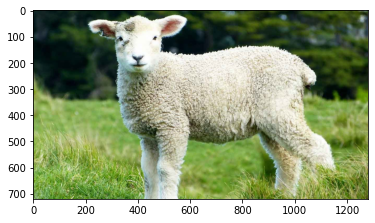

In [ ]:
a=imread('https://i.ytimg.com/vi/9HrEYNe54fc/maxresdefault.jpg')
print(a.shape)
plt.imshow(a)
new=[]
imgresized = resize(a,(50,50,3))
new.append(imgresized.flatten())
new

In [ ]:
b=np.array(new)

In [ ]:
p=model.predict(b)    
p

array(['goat animal'], dtype=object)